Multidimensional Scaling (MDS)
===

* *0:00 min* | Última modificación: Septiembre 22, 2021 | YouTube

Esta es una técnica de visualiazación de datos basada en la disimilitud (que tan diferentes son los datos), donde se pretende respetar las distancias entre pares de patrones.

En el algoritmo métrico se tiene la matriz de distancias entte elementos:

$$
D = [d_{ij}]
$$

dende $D$ tiene $M$ dimensiones. El objetivo es minimizar la función Stress definida como:

$$
\sum_{i \ne j = 1, ...,N} 
\left(
d_{ij} - ||x_i - x_j||^2 
\right)
$$

Hay $M$ vectores $x$ de $N$ dimensiones. Los vectores $x$ forman el embedding.

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [1]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6, return_X_y=False)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

![digits_dataset.png](assets/digits_dataset.png)

In [2]:
import numpy as np
from sklearn.manifold import MDS

n_neighbors = 30

mds = MDS(
    # -----------------------------------------------------
    # Number of dimensions in which to immerse the
    # dissimilarities.
    n_components=2,
    # -----------------------------------------------------
    # If True, perform metric MDS; otherwise, perform
    # nonmetric MDS.
    metric=True,
    # -----------------------------------------------------
    # Determines the random number generator used to
    # initialize the centers.
    random_state=None,
    # -----------------------------------------------------
    # Number of times the SMACOF algorithm will be run with
    # different initializations.
    n_init=1,
    # -----------------------------------------------------
    # Maximum number of iterations of the SMACOF algorithm
    # for a single run.
    max_iter=100,
    # -----------------------------------------------------
    # ‘euclidean’: Pairwise Euclidean distances between
    #    points in the dataset.
    # ‘precomputed’: Pre-computed dissimilarities are
    #    passed directly to fit and fit_transform.
    dissimilarity="euclidean",
)

#
# El objeto retornado tiene los siguientes atributos:
#   embedding_
#   stress_ : The final value of the stress (sum of
#      squared distance of the disparities and the
#      distances for all constrained points).
#   dissimilarity_matrix_
#   n_iter_
#

X_projected = mds.fit_transform(X)

x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_scaled = (X_projected - x_min) / (x_max - x_min)

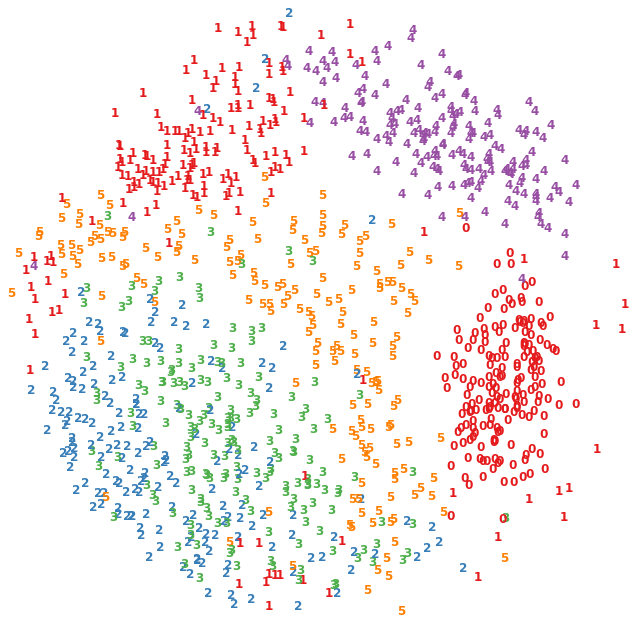

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 11))
# plt.style.use("dark_background")

for i in range(X_scaled.shape[0]):

    plt.text(
        X_scaled[i, 0],
        X_scaled[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 12},
    )


plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()